# Irisデータセットの読み込み

In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


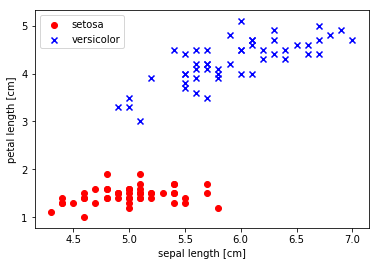

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker = 'o', label = 'setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color = 'blue', marker = 'x', label = 'versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()

## パーセプトロンモデルのトレーニング

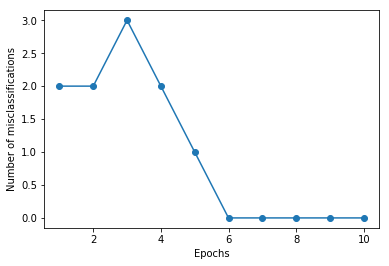

In [3]:
import perceptron
ppn = perceptron.Perceptron(eta = 0.1, n_iter =10)
ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## 決定境界のプロット

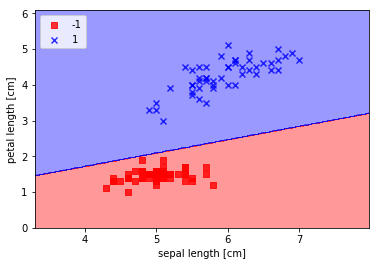

In [4]:
import pdr

pdr.plot_decision_regions(X, y, classifier = ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()

## ADALINE

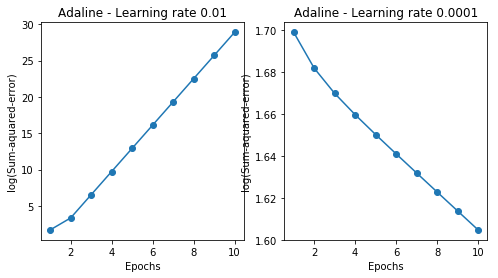

In [3]:
import adaline

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 4))
ada1 = adaline.AdalineGD(n_iter = 10, eta = 0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker = 'o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-aquared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = adaline.AdalineGD(n_iter = 10, eta = 0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), np.log10(ada2.cost_), marker = 'o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-aquared-error)')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()

Learning rate 0.01: 学習率が大き過ぎて，エポックごとに誤差平方和が増加

Learning rate 0.0001: 収束させるには相当なエポック数が必要

## 特徴量のスケーリング

In [4]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

スケーリングしたサンプルでトレーニング

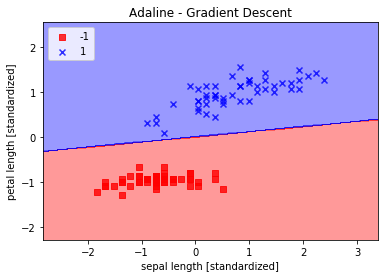

/Users/hiroki/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


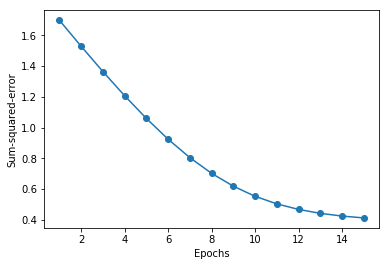

In [6]:
import adaline
import pdr

ada = adaline.AdalineGD(n_iter = 15, eta = 0.01)
ada.fit(X_std, y)

pdr.plot_decision_regions(X_std, y, classifier = ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc = 'upper left')
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), np.log10(ada.cost_), marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.legend(loc = 'upper left')
plt.show()

## 確率的勾配降下法

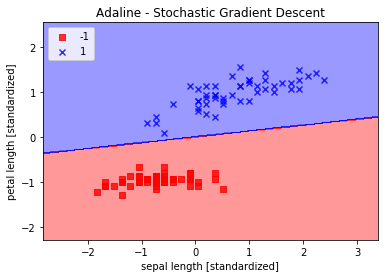

/Users/hiroki/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


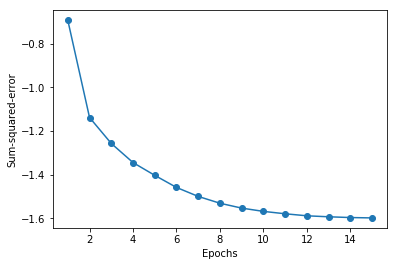

In [5]:
import adalinesgd
import pdr

ada = adalinesgd.AdalineSGD(n_iter = 15, eta = 0.01)
ada.fit(X_std, y)

pdr.plot_decision_regions(X_std, y, classifier = ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc = 'upper left')
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), np.log10(ada.cost_), marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.legend(loc = 'upper left')
plt.show()

### メモ

In [37]:
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

In [38]:
mid1 = np.arange(x1_min, x1_max, 0.02)
mid2 = np.arange(x2_min, x2_max, 0.02)

In [41]:
xx1, xx2 =np.meshgrid(mid1, mid2)

In [57]:
np.unique(y == 1)

array([False,  True], dtype=bool)